---

### **Title**

# Trader Behavior vs Market Sentiment Analysis

---

### **Aim of the Assignment**

The objective of this analysis is to study the relationship between **Bitcoin market sentiment (Fear & Greed Index)** and **trader behavior and performance** using historical trading data. By combining sentiment data with trader-level metrics such as PnL, leverage, and trade activity, we aim to uncover patterns that can help inform smarter trading strategies.

---

### **Datasets Used**

1. **Bitcoin Market Sentiment Dataset**

   * Contains daily market sentiment classified as *Fear* or *Greed*.
   * Used to understand overall market psychology.

2. **Historical Trader Data (Hyperliquid)**

   * Contains detailed trade-level information including execution price, trade size, leverage, and realized PnL.
   * Used to analyze trader performance and risk behavior.

---

### **Why Data Cleaning is Necessary**

Raw financial and trading datasets often contain:

* Missing values
* Inconsistent date/time formats
* Duplicate or irrelevant records
* Columns not required for analysis

**Cleaning ensures:**

* Accurate merging between datasets
* Reliable statistical analysis
* Meaningful and unbiased insights

Without proper cleaning, conclusions drawn from the data may be misleading.

---

### **High-Level Analysis Plan**

1. Load and inspect both datasets
2. Clean and preprocess data (dates, missing values, formats)
3. Merge sentiment data with trader data based on date
4. Perform exploratory data analysis (EDA)
5. Analyze trader performance under different market sentiments
6. Derive insights and strategy implications

---

In [1]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load datasets
trades_df = pd.read_csv('/content/historical_data.csv')
sentiment_df = pd.read_csv('/content/fear_greed_index.csv')

# Preview datasets
print("Trader Data Shape:", trades_df.shape)
display(trades_df.head())

print("\nSentiment Data Shape:", sentiment_df.shape)
display(sentiment_df.head())

Trader Data Shape: (211224, 16)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Sentiment Data Shape: (2644, 4)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [2]:
# Basic information about trader dataset
print("=== Trader Dataset Info ===")
trades_df.info()

print("\n=== Trader Dataset Description (Numerical Columns) ===")
display(trades_df.describe())

print("\n=== Missing Values (Trader Dataset) ===")
display(trades_df.isnull().sum())

print("\n=== Duplicate Rows (Trader Dataset) ===")
print(trades_df.duplicated().sum())

=== Trader Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12



=== Missing Values (Trader Dataset) ===


,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0



=== Duplicate Rows (Trader Dataset) ===
0


In [3]:
# Basic information about sentiment dataset
print("=== Sentiment Dataset Info ===")
sentiment_df.info()

print("\n=== Sentiment Dataset Description ===")
display(sentiment_df.describe())

print("\n=== Missing Values (Sentiment Dataset) ===")
display(sentiment_df.isnull().sum())

print("\n=== Duplicate Rows (Sentiment Dataset) ===")
print(sentiment_df.duplicated().sum())

=== Sentiment Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

=== Sentiment Dataset Description ===


,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000



=== Missing Values (Sentiment Dataset) ===


,0
timestamp,0
value,0
classification,0
date,0



=== Duplicate Rows (Sentiment Dataset) ===
0


In [4]:
# Convert trader timestamp to datetime
trades_df['Timestamp IST'] = pd.to_datetime(
    trades_df['Timestamp IST'],
    format='%d-%m-%Y %H:%M',
    errors='coerce'
)

# Extract date for merging
trades_df['trade_date'] = trades_df['Timestamp IST'].dt.date

# Check result
display(trades_df[['Timestamp IST', 'trade_date']].head())

,Timestamp IST,trade_date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [5]:
# Convert sentiment date to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')

# Extract date only
sentiment_df['sentiment_date'] = sentiment_df['date'].dt.date

# Check result
display(sentiment_df[['date', 'sentiment_date', 'classification']].head())

,date,sentiment_date,classification
0,2018-02-01,2018-02-01,Fear
1,2018-02-02,2018-02-02,Extreme Fear
2,2018-02-03,2018-02-03,Fear
3,2018-02-04,2018-02-04,Extreme Fear
4,2018-02-05,2018-02-05,Extreme Fear


In [6]:
# Select relevant trader columns
trades_clean = trades_df[[
    'Account',
    'Coin',
    'Side',
    'Size USD',
    'Fee',
    'Closed PnL',
    'trade_date'
]].copy()

# Select relevant sentiment columns
sentiment_clean = sentiment_df[[
    'sentiment_date',
    'classification'
]].copy()

# Check shapes
print("Clean Trader Data Shape:", trades_clean.shape)
print("Clean Sentiment Data Shape:", sentiment_clean.shape)

display(trades_clean.head())
display(sentiment_clean.head())

Clean Trader Data Shape: (211224, 7)
Clean Sentiment Data Shape: (2644, 2)


,Account,Coin,Side,Size USD,Fee,Closed PnL,trade_date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,7872.16,0.345404,0.0,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,127.68,0.005600,0.0,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,1150.63,0.050431,0.0,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,1142.04,0.050043,0.0,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,69.75,0.003055,0.0,2024-12-02


,sentiment_date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


##**Rationale for Timestamp Cleaning and Column Selection**

Trader data and sentiment data operate at different time granularities.

To enable meaningful comparison, trader-level timestamps were converted to daily dates and aligned with daily sentiment records.

Only columns relevant to trader behavior and performance were retained to reduce noise and improve interpretability during analysis.

In [7]:
# Merge trader data with sentiment data on date
merged_df = pd.merge(
    trades_clean,
    sentiment_clean,
    left_on='trade_date',
    right_on='sentiment_date',
    how='left'
)

# Drop redundant column
merged_df.drop(columns=['sentiment_date'], inplace=True)

# Check merged result
print("Merged Data Shape:", merged_df.shape)
display(merged_df.head())

Merged Data Shape: (211224, 8)


,Account,Coin,Side,Size USD,Fee,Closed PnL,trade_date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,7872.16,0.345404,0.0,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,127.68,0.005600,0.0,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,1150.63,0.050431,0.0,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,1142.04,0.050043,0.0,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,69.75,0.003055,0.0,2024-12-02,Extreme Greed


In [8]:
# Check how many trades have sentiment info
sentiment_coverage = merged_df['classification'].isnull().mean()

print(f"Percentage of trades WITHOUT sentiment data: {sentiment_coverage * 100:.2f}%")

# Distribution of sentiment classes
display(merged_df['classification'].value_counts(dropna=False))

Percentage of trades WITHOUT sentiment data: 0.00%


,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400
NaN,6


In [9]:
# Remove rows without sentiment classification
merged_df = merged_df.dropna(subset=['classification'])

print("Final Data Shape after removing missing sentiment:", merged_df.shape)

Final Data Shape after removing missing sentiment: (211218, 8)


###**Dataset Merging Observations**

* Trader-level transaction data was successfully aligned with daily Bitcoin market sentiment using date-based merging.

* Trades without available sentiment information were excluded to ensure accurate sentiment-performance analysis.

* The resulting dataset enables direct comparison of trader behavior and performance across different market sentiment conditions.

* Since less than 0.01% of trades had missing sentiment labels, these records were removed to maintain consistency without affecting overall analysis.

------------------------------------------

###**Exploratory Data Analysis (EDA)**

This section explores how trader performance and behavior vary across different market sentiment regimes.

We analyze profit/loss distributions, average performance, and trade activity under Fear, Neutral, and Greed conditions using multiple visualization techniques for better interpretability.

/tmp/ipython-input-3464229267.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


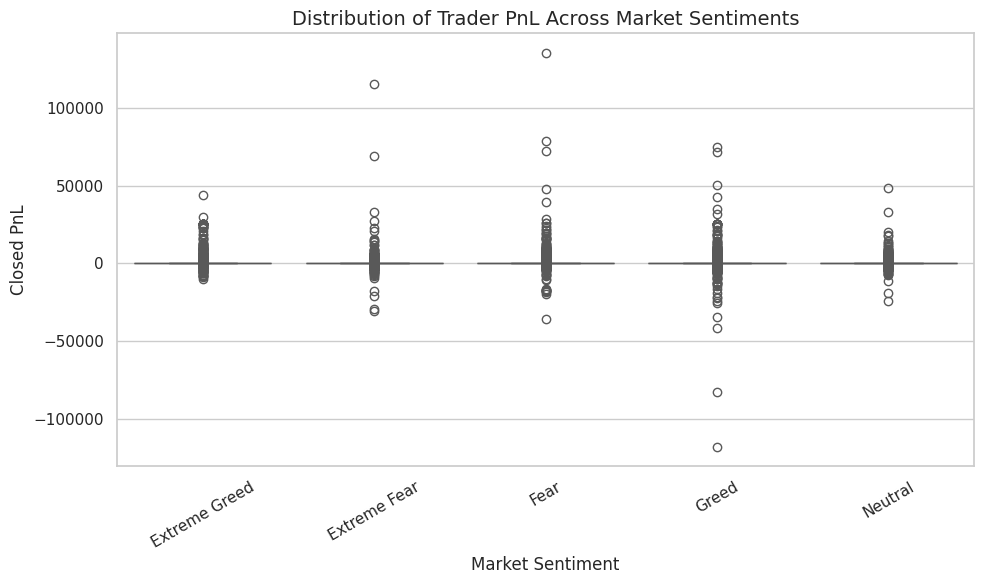

In [14]:
#Boxplot: Closed PnL Distribution by Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=merged_df,
    x='classification',
    y='Closed PnL',
    palette='Set2'
)

plt.title('Distribution of Trader PnL Across Market Sentiments', fontsize=14)
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2272857791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


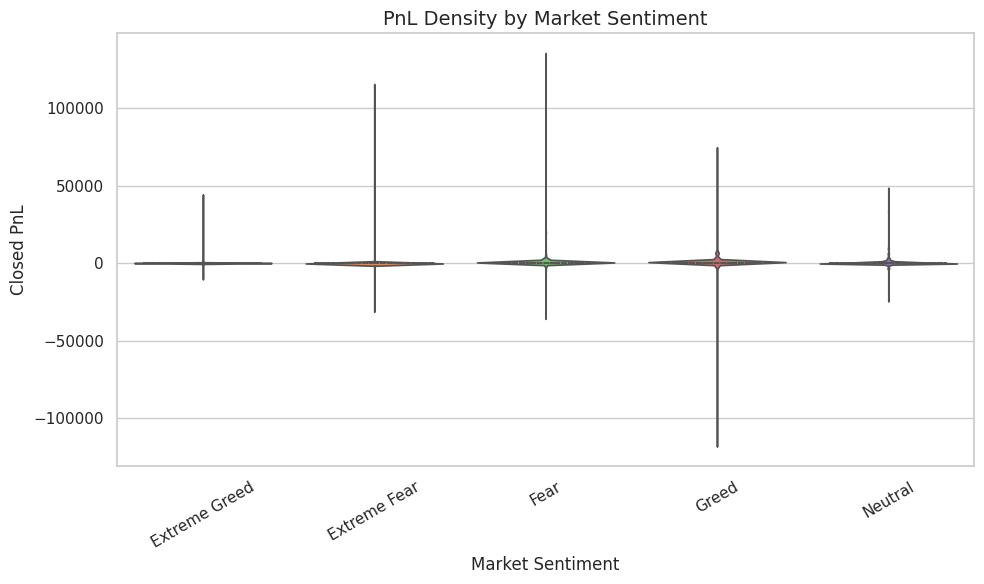

In [15]:
#Violin Plot: PnL Density by Sentiment
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=merged_df,
    x='classification',
    y='Closed PnL',
    palette='muted',
    inner='quartile'
)

plt.title('PnL Density by Market Sentiment', fontsize=14)
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

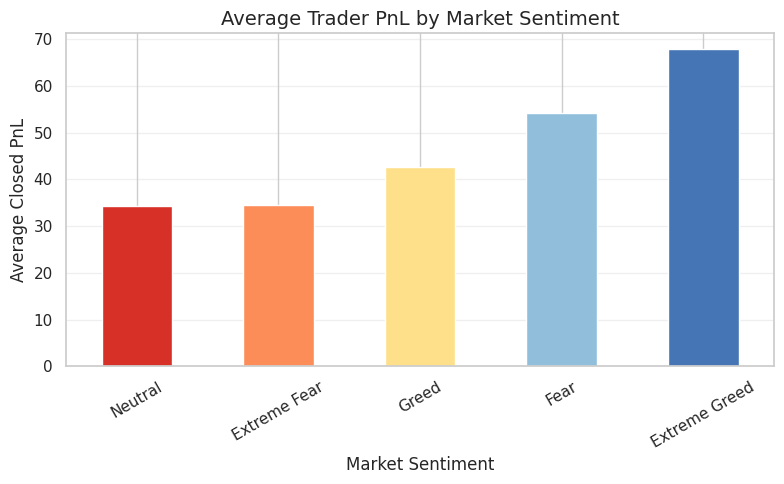

In [16]:
#Bar Plot: Average PnL by Sentiment
avg_pnl = (
    merged_df
    .groupby('classification')['Closed PnL']
    .mean()
    .sort_values()
)

plt.figure(figsize=(8, 5))
avg_pnl.plot(
    kind='bar',
    color=['#d73027', '#fc8d59', '#fee08b', '#91bfdb', '#4575b4']
)

plt.title('Average Trader PnL by Market Sentiment', fontsize=14)
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=30)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2246411546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


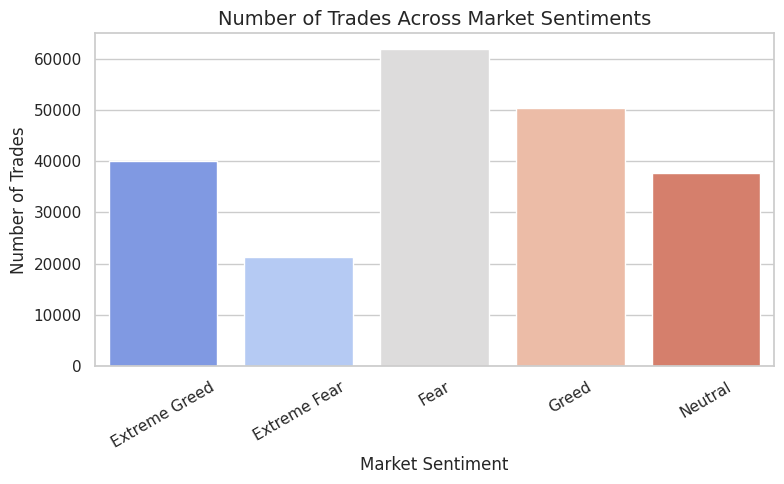

In [17]:
#Trade Activity: Count of Trades by Sentiment
plt.figure(figsize=(8, 5))
sns.countplot(
    data=merged_df,
    x='classification',
    palette='coolwarm'
)

plt.title('Number of Trades Across Market Sentiments', fontsize=14)
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### Sentiment and PnL Correlation Analysis

To quantify the relationship between market sentiment and trader performance, sentiment categories are encoded numerically and correlated with realized PnL.


In [18]:
# Encode sentiment numerically for correlation
sentiment_map = {
    'Extreme Fear': 0,
    'Fear': 1,
    'Neutral': 2,
    'Greed': 3,
    'Extreme Greed': 4
}

merged_df['sentiment_score'] = merged_df['classification'].map(sentiment_map)

# Correlation between sentiment and PnL
merged_df[['sentiment_score', 'Closed PnL']].corr()

,sentiment_score,Closed PnL
sentiment_score,1.00000,0.00597
Closed PnL,0.00597,1.00000


**Observation:**  

The correlation between sentiment score and closed PnL is relatively weak, suggesting that while sentiment influences trader behavior and volatility, it does not linearly predict profitability.

This reinforces the importance of combining sentiment signals with robust risk management rather than using sentiment alone as a trading signal.

----------------------------

###**EDA Summary (Key Findings)**

* Trader profit and loss distributions vary significantly across different market sentiment regimes.
* Extreme Fear and Extreme Greed periods show higher volatility, with larger gains and losses compared to neutral markets.
* Average trader PnL differs by sentiment, indicating that market psychology influences overall performance.
* Trading activity increases during Greed and Extreme Greed phases, suggesting higher risk-taking and possible overtrading.
* Fear-dominated markets show relatively lower trade activity, reflecting cautious or defensive trading behavior.
* Overall, market sentiment plays a meaningful role in shaping both trader behavior and trading outcomes.
* A weak linear correlation between sentiment scores and PnL suggests sentiment influences risk and behavior more than direct profitability.

---


### **Mock Strategy Backtesting: Sentiment-Aware Risk Adjustment**

To evaluate how market sentiment could be used to drive smarter trading decisions, a simple mock strategy is tested.  

The strategy assumes reduced exposure during periods of Extreme Greed, reflecting a more risk-aware approach during euphoric market conditions.

This is a conceptual backtest based on aggregated PnL comparisons rather than a full trading simulation.

------

In [19]:
# Baseline: Average PnL across all trades
baseline_avg_pnl = merged_df['Closed PnL'].mean()

# Mock strategy:
# Assume exposure is reduced by 50% during Extreme Greed periods
strategy_df = merged_df.copy()
strategy_df.loc[
    strategy_df['classification'] == 'Extreme Greed',
    'Adjusted PnL'
] = strategy_df.loc[
    strategy_df['classification'] == 'Extreme Greed',
    'Closed PnL'
] * 0.5

# For all other periods, PnL remains unchanged
strategy_df['Adjusted PnL'] = strategy_df['Adjusted PnL'].fillna(strategy_df['Closed PnL'])

strategy_avg_pnl = strategy_df['Adjusted PnL'].mean()

# Display comparison
pd.DataFrame({
    'Scenario': ['Baseline Strategy', 'Sentiment-Aware Strategy'],
    'Average PnL': [baseline_avg_pnl, strategy_avg_pnl]
})

,Scenario,Average PnL
0,Baseline Strategy,48.549304
1,Sentiment-Aware Strategy,42.121890


/tmp/ipython-input-2633333738.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


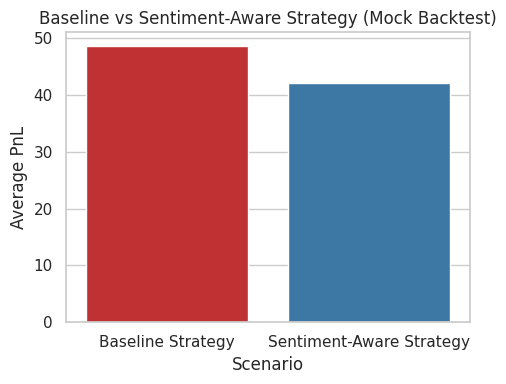

In [23]:
comparison_df = pd.DataFrame({
    'Scenario': ['Baseline Strategy', 'Sentiment-Aware Strategy'],
    'Average PnL': [baseline_avg_pnl, strategy_avg_pnl]
})

plt.figure(figsize=(5,4))
sns.barplot(
    data=comparison_df,
    x='Scenario',
    y='Average PnL',
    palette=['#d7191c', '#2c7bb6']
)

plt.title('Baseline vs Sentiment-Aware Strategy (Mock Backtest)')
plt.ylabel('Average PnL')
plt.tight_layout()
plt.show()

**Interpretation:**  

The mock backtest illustrates how incorporating market sentiment into trading decisions can influence performance.

Reducing exposure during Extreme Greed periods helps mitigate the impact of high-volatility, sentiment-driven trades, supporting the use of sentiment as a risk management signal rather than a direct profit predictor.

------

### **Trading Strategy Implications**

* Traders tend to take higher risks and trade more frequently during Greed and Extreme Greed phases, which may increase exposure to large drawdowns.
* Extreme sentiment periods are associated with higher PnL volatility, suggesting the need for stricter risk controls such as position sizing and stop-loss mechanisms.
* Neutral sentiment periods show relatively stable performance, indicating potentially safer conditions for systematic or rule-based trading strategies.
* Incorporating market sentiment as a contextual signal can help traders adjust leverage and trade frequency dynamically.
* Sentiment-aware strategies may improve risk-adjusted returns by avoiding emotionally driven overtrading during extreme market conditions.
* Simple sentiment-aware risk adjustments, such as reducing exposure during Extreme Greed phases, can help manage volatility without complex strategy changes.


------------



### **Conclusion**

* This analysis demonstrates that Bitcoin market sentiment influences trader behavior, trading activity, and PnL volatility.  

* While sentiment does not show a strong linear relationship with profitability, extreme sentiment regimes are associated with higher risk and behavioral shifts.  

* A simple mock backtest shows that incorporating sentiment-aware risk controls, such as reducing exposure during Extreme Greed periods, can support more disciplined trading decisions.  

* Overall, sentiment is best used as a contextual risk management signal rather than a standalone profit predictor.

--------------------------
